#Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#specify the drive/.../filename to read

Mounted at /content/drive/


In [ ]:
#Sania
data_df=pd.read_csv("/content/drive/MyDrive/MLBootcamp/Colab_Notebooks/Data/house-prices-advanced-regression-techniques/train.csv")
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Preprocessing

Making a data frame just for PCA and TSNE, and deleting the rows that don't have just numbers in them

In [ ]:
for_model = data_df.dropna()

Finding out outliers of columns with large variation of data


In [ ]:
#applied get_dummies to all the columns with obj type data
cols_to_encode = ['MSZoning', 'Street', 'Alley','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating']
ohe = pd.get_dummies(data_df[cols_to_encode])
data_df = pd.concat([data_df, ohe], axis=1)

NameError: ignored

In [ ]:
#dropping all the columns we one hot vectorized
clean_df = data_df.drop(columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Heating'])

In [ ]:
#S
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

NameError: ignored

<Figure size 2000x2000 with 0 Axes>

In [ ]:
#combined all the odd columns together
clean_df = clean_df.dropna()

In [ ]:
clean = clean_df
clean_df.dropna()

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,1,60,65.0,8450,5,2003,2003,196.0,706,0,...,0,0,1,0,0,1,0,0,0,0
1,2,20,80.0,9600,8,1976,1976,0.0,978,0,...,0,0,1,0,0,1,0,0,0,0
2,3,60,68.0,11250,5,2001,2002,162.0,486,0,...,0,0,1,0,0,1,0,0,0,0
3,4,70,60.0,9550,5,1915,1970,0.0,216,0,...,0,0,0,0,0,1,0,0,0,0
4,5,60,84.0,14260,5,2000,2000,350.0,655,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,5,1999,2000,0.0,0,0,...,0,0,1,0,0,1,0,0,0,0
1456,1457,20,85.0,13175,6,1978,1988,119.0,790,163,...,0,0,1,0,0,1,0,0,0,0
1457,1458,70,66.0,9042,9,1941,2006,0.0,275,0,...,0,0,1,0,0,1,0,0,0,0
1458,1459,20,68.0,9717,6,1950,1996,0.0,49,1029,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
count = 0
for col in clean.columns:
    count = count + 1
    print(col)
print(count)

Id
MSSubClass
LotFrontage
LotArea
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_Mea

#Using AutoML to find Regressor --> Shochruz

Importing required libraries for autoML

In [ ]:

!pip install tpot

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tpot import TPOTRegressor

In [ ]:
#This function is for auto ML
#tpot is one of the first auto machine learning models created
def auto_ml_regression():
    X=clean_df.drop(['SalePrice'], axis=1)
    y=clean_df['SalePrice']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the TPOTRegressor model
    model = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Mean Squared Error:", mse)


# Run the AutoML regression module
auto_ml_regression()

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1061782875.6240594

Generation 2 - Current best internal CV score: -1061782875.6240594

Generation 3 - Current best internal CV score: -954340935.7200005

Generation 4 - Current best internal CV score: -954340935.7200005

Generation 5 - Current best internal CV score: -954340935.7200005

Best pipeline: RandomForestRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=7, min_samples_split=13, n_estimators=100)
Mean Squared Error: 34917.65560975357


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tpot import TPOTRegressor

In [ ]:
X = clean_df.drop(['SalePrice'], axis=1)
y = clean_df['SalePrice']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create an instance of TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=20, scoring='r2', verbosity=2, random_state=1, n_jobs=-1)

In [ ]:
tpot = TPOTRegressor(generations=5, population_size=20, scoring='r2', verbosity=2, random_state=1, n_jobs=-1)

# Fit the TPOT regressor on the training data
tpot.fit(X_train, y_train)

# Print the best pipeline found by TPOT
print(tpot.fitted_pipeline_)

# Evaluate the performance on the training set
train_predictions = tpot.predict(X_train)
train_r2_score = r2_score(y_train, train_predictions)
print("Train R2 score:", train_r2_score)

# Evaluate the performance on the test set
test_predictions = tpot.predict(X_test)
test_r2_score = r2_score(y_test, test_predictions)
print("Test R2 score:", test_r2_score)



Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Best pipeline: ExtraTreesRegressor(ExtraTreesRegressor(input_matrix, bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=12, min_samples_split=5, n_estimators=100), bootstrap=False, max_features=0.1, min_samples_leaf=4, min_samples_split=14, n_estimators=100)
Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True,
                                                                 max_features=0.9000000000000001,
                                                                 min_samples_leaf=12,
                                                                 min_samples_split=5,
                                                                 random_state=1))),
                ('extratreesregressor',
                 ExtraTreesRegressor(max_features=0.1, min_samples_leaf=4,
                                     min_samples_split=14, random_state=1))])
Train R2 score: 0.8864640455653486
Test R2 score: 0.8411401

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


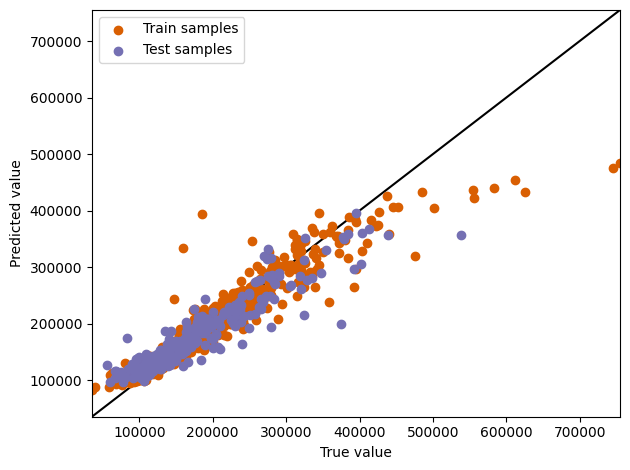

In [ ]:
# Scatter plots of true vs predicted values
plt.scatter(y_train, train_predictions, label="Train samples", c="#d95f02")
plt.scatter(y_test, test_predictions, label="Test samples", c="#7570b3")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.legend()
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)], c="k", zorder=0)
plt.xlim([np.min(y), np.max(y)])
plt.ylim([np.min(y), np.max(y)])
plt.tight_layout()
plt.show()

#RandomForestRegressor SKLearn

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = clean_df.drop(['SalePrice'], axis=1)
y = clean_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 33393.613439937915
